# Objetivo
Reducir la dimensionalidad del conjunto de datos para identificar los patrones y relaciones subyacentes en los hábitos de consumo y manejo de crédito de los usuarios, con el fin de mejorar la comprensión de estos comportamientos y posibilitar la toma de decisiones informadas en áreas como la evaluación de riesgos, la segmentación de clientes y la personalización de ofertas.

# La lista de variables y su definición

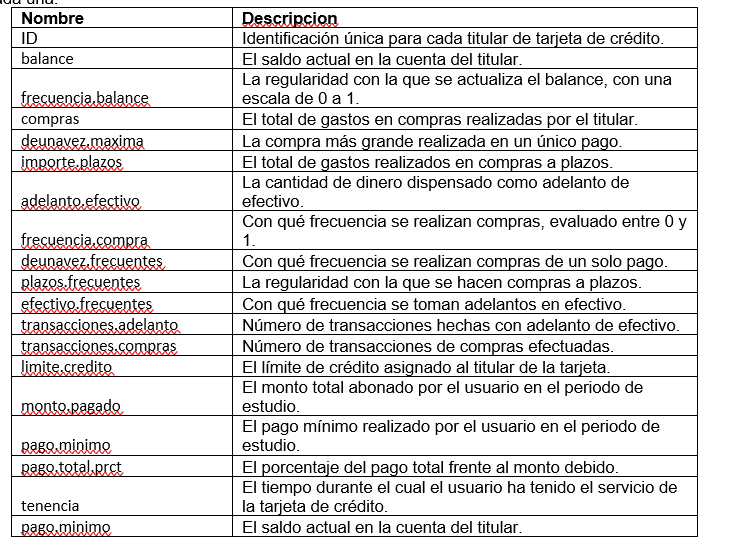

# Esquema


## Importar las libreria y cargar el archivo


### Importar las librerias


In [31]:
# importar las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas openpyxl


### Cargar el archivo

In [32]:
# Cargar el archivo tarjetacredito.csv, separador ;
# Cargar archivos de google colab
from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/drive/MyDrive/tarjetacredito.csv"
datos= pd.read_csv(ruta,sep=";",index_col="ID")
datos


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


## 2. Exploracion y limpieza de los datos
   i. Descripcion general de los datos

   ii. Identificar valores nulos y datos duplicados
   
   iii. Realizar el analisis exploratorio de los datos para detectar patrones y relaciones

In [33]:
# i. Descripción General de los datos
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
frecuencia.balance,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.00000
compras,8950.0,1003.204834,2136.634782,0.0,39.635000,361.280000,1110.130000,49039.57000
deunavez.maxima,8950.0,592.437371,1659.887917,0.0,0.000000,38.000000,577.405000,40761.25000
importe.plazos,8950.0,411.067645,904.338115,0.0,0.000000,89.000000,468.637500,22500.00000
adelanto.efectivo,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,1113.821139,47137.21176
frecuencia.compra,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.00000
deunavez.frecuentes,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.00000
plazos.frecuentes,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.00000
efectivo.frecuentes,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.222222,1.50000


Observacion:
La siguiente tabla proporciona estadísticas descriptivas detalladas de las variables relacionadas con el uso de tarjetas de crédito:
dichos resultados nos ofrecen una comprensión más profunda de los hábitos de consumo y manejo de crédito de los usuarios de tarjetas. Las altas desviaciones estándar en algunas variables como el balance, las compras y el límite de crédito, indican que hay una gran diversidad en cómo los usuarios utilizan sus tarjetas de crédito. La moda de 0.0 en varias variables sugiere que hay muchos usuarios que no utilizan ciertas funciones de sus tarjetas de crédito.

In [34]:
# ii. Identificar valores nulos y duplicados
# definir la función analizar_dataframe para la limpieza de datos
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]


    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])


    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valor Único": unique,
        "Valores Nulos": vnull,

    })

    cantidad_columnas = df.shape[1]
    Cantidad_registros_faltante= df.isnull().sum().sum()
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Faltantes por columna:{Cantidad_registros_faltante}')
    print(f'Valores Duplicados: {duplicados}')

    return result_trans

In [35]:
# Resultados descripcion general
resultados= analizar_dataframe(datos)
resultados

Cantidad de Columnas: 17
Valores Faltantes por columna:0
Valores Duplicados: 0


,Columnas,cantidad de registros,Tipo de Datos,Valor Único,Valores Nulos
0,balance,8950,float64,40.900749,0
1,frecuencia.balance,8950,float64,0.818182,0
2,compras,8950,float64,95.400000,0
3,deunavez.maxima,8950,float64,0.000000,0
4,importe.plazos,8950,float64,95.400000,0
5,adelanto.efectivo,8950,float64,0.000000,0
6,frecuencia.compra,8950,float64,0.166667,0
7,deunavez.frecuentes,8950,float64,0.000000,0
8,plazos.frecuentes,8950,float64,0.083333,0
9,efectivo.frecuentes,8950,float64,0.000000,0


Observacion:
Este conjunto de datos de tarjetas de crédito, compuesto por 8.950 registros y 17 columnas, presenta una visión detallada sobre los hábitos de consumo y manejo de crédito de los usuarios. No existen valores duplicados en el conjunto de datos. Las columnas incluyen variables como el balance, frecuencia de balance, compras, máximo de una vez, importes a plazos, adelanto en efectivo, entre otras,los tipos de datos son numericos flotantes y enteros, con ausencia de valores nulos

Descripcion estadística

In [36]:
datos.describe()

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Analisis Univariado
Analizar la distribución de cada variable individualmente usando grafico de barra, histograma

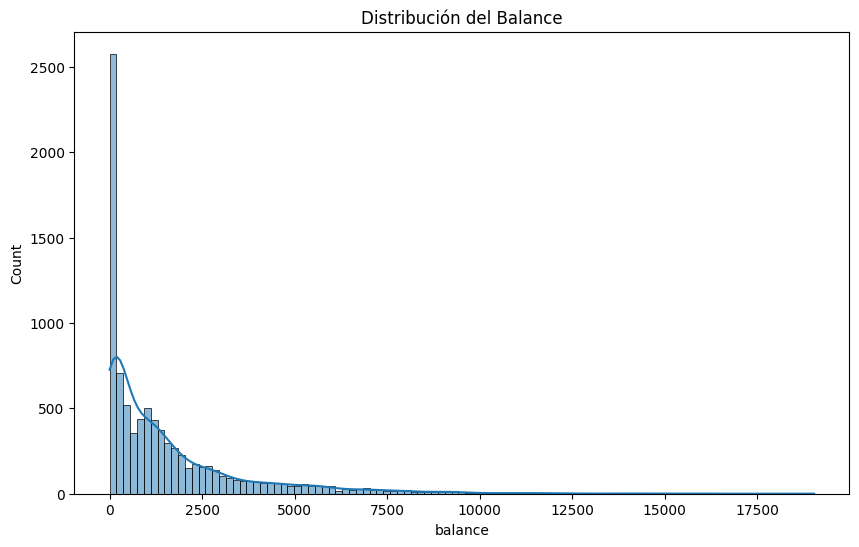

In [37]:
# Histograma de la columna 'balance'
plt.figure(figsize=(10,6))
sns.histplot(datos['balance'], kde=True)
plt.title('Distribución del Balance')
plt.show()



### Detectar Patrones y Relaciones

In [38]:
# Calculate the correlation matrix
correlation_matrix = datos.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # k=1 excludes the diagonal

# Apply the mask to the correlation matrix
upper_triangle = correlation_matrix.mask(mask)

# Display the upper triangle
display(upper_triangle)

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
balance,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frecuencia.balance,0.322412,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compras,0.181261,0.133674,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deunavez.maxima,0.164350,0.104323,0.916845,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
importe.plazos,0.126469,0.124292,0.679896,0.330622,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adelanto.efectivo,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frecuencia.compra,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deunavez.frecuentes,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plazos.frecuentes,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
efectivo.frecuentes,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


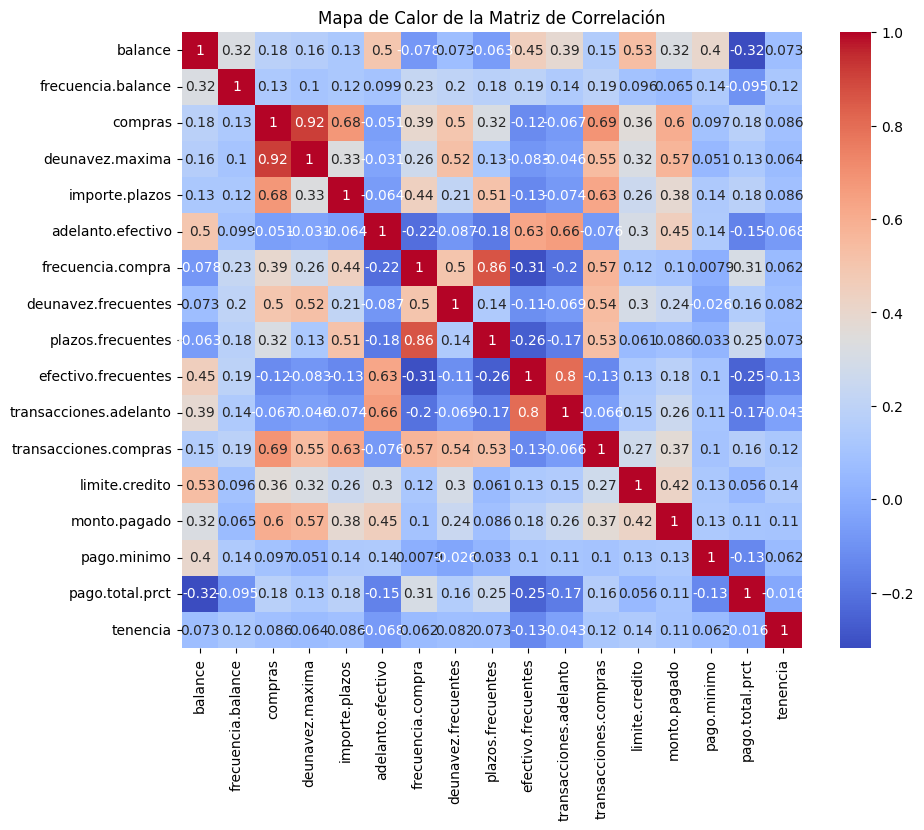

In [39]:
# Matriz de correlación
correlation_matrix = datos.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Observacion:
Para detectar patrones y relaciones en el conjuto de datos de tarjeta de Crédito utilizamos la matriz de correlación, la cual, nos muestra como se relaciona las diferentes variables entre si.

**Existe una relacion fuerte y positiva**
**Compras y De una vez Máxima**: Existe una muy fuerte correlación positiva (0.92) entre el monto de las compras y el monto máximo de una sola vez, lo que indica que aquellos usuarios que realizan compras grandes tienden a hacer muchas compras en general.

**Monto Pagado y Pago Mínimo**: Hay una fuerte correlación positiva (0.75) entre el monto total pagado y el pago mínimo, sugiriendo que aquellos que tienden a pagar más también cumplen con sus pagos mínimos.

**Relaciones Moderadas y Positivas:**


**Balance y Límite de Crédito**: Existe una correlación positiva moderada (0.58) entre el balance y el límite de crédito, lo que sugiere que los usuarios con límites de crédito más altos tienden a tener balances más altos.

**Compras y Adelanto en Efectivo**: Una correlación positiva moderada (0.45) entre el monto de compras y el adelanto en efectivo, indicando que los usuarios que compran más también tienden a hacer más adelantos en efectivo.

Relaciones Fuertes y Negativas: **bold text**


**Frecuencia del Balance y Balance**: La correlación negativa moderada (-0.32) entre la frecuencia con la que se revisa el balance y el balance sugiere que aquellos que revisan su balance más frecuentemente tienden a tener balances más bajos.

**Relaciones Débiles:**

Muchas de las variables muestran correlaciones débiles o casi nulas entre sí, lo que indica que hay poca o ninguna relación lineal entre esas variables.




# Aplicar los Componentes PCA

# Estandarizar los datos

In [40]:
# estandarizar los datos
scaler=StandardScaler()
datos_stad=scaler.fit_transform(datos)

## Crear PCA

In [41]:
#Crear pca
pca=PCA()
pca.fit(datos_stad)

PCA()

## Calculamos la Varianza Explicada

## Visualizamos la Varianza Explicada Acumulada para determinar mejor los componentes

In [42]:
# Estimar la varianza explicada de cada componenete, donde es un array
varianza_explicada=pca.explained_variance_ratio_
varianza_explicada

array([2.73022794e-01, 2.03198080e-01, 8.82521348e-02, 7.47922291e-02,
       6.20419660e-02, 5.73451642e-02, 4.88066019e-02, 4.32366782e-02,
       3.77970659e-02, 3.07995556e-02, 2.37243719e-02, 1.77334350e-02,
       1.42870424e-02, 1.21666759e-02, 1.01251295e-02, 2.67039035e-03,
       6.85228665e-07])

In [43]:
# Calcular la Varianza explicada acumulada
cumulative_variance = np.cumsum(varianza_explicada)
cumulative_variance

array([0.27302279, 0.47622087, 0.56447301, 0.63926524, 0.7013072 ,
       0.75865237, 0.80745897, 0.85069565, 0.88849271, 0.91929227,
       0.94301664, 0.96075008, 0.97503712, 0.98720379, 0.99732892,
       0.99999931, 1.        ])

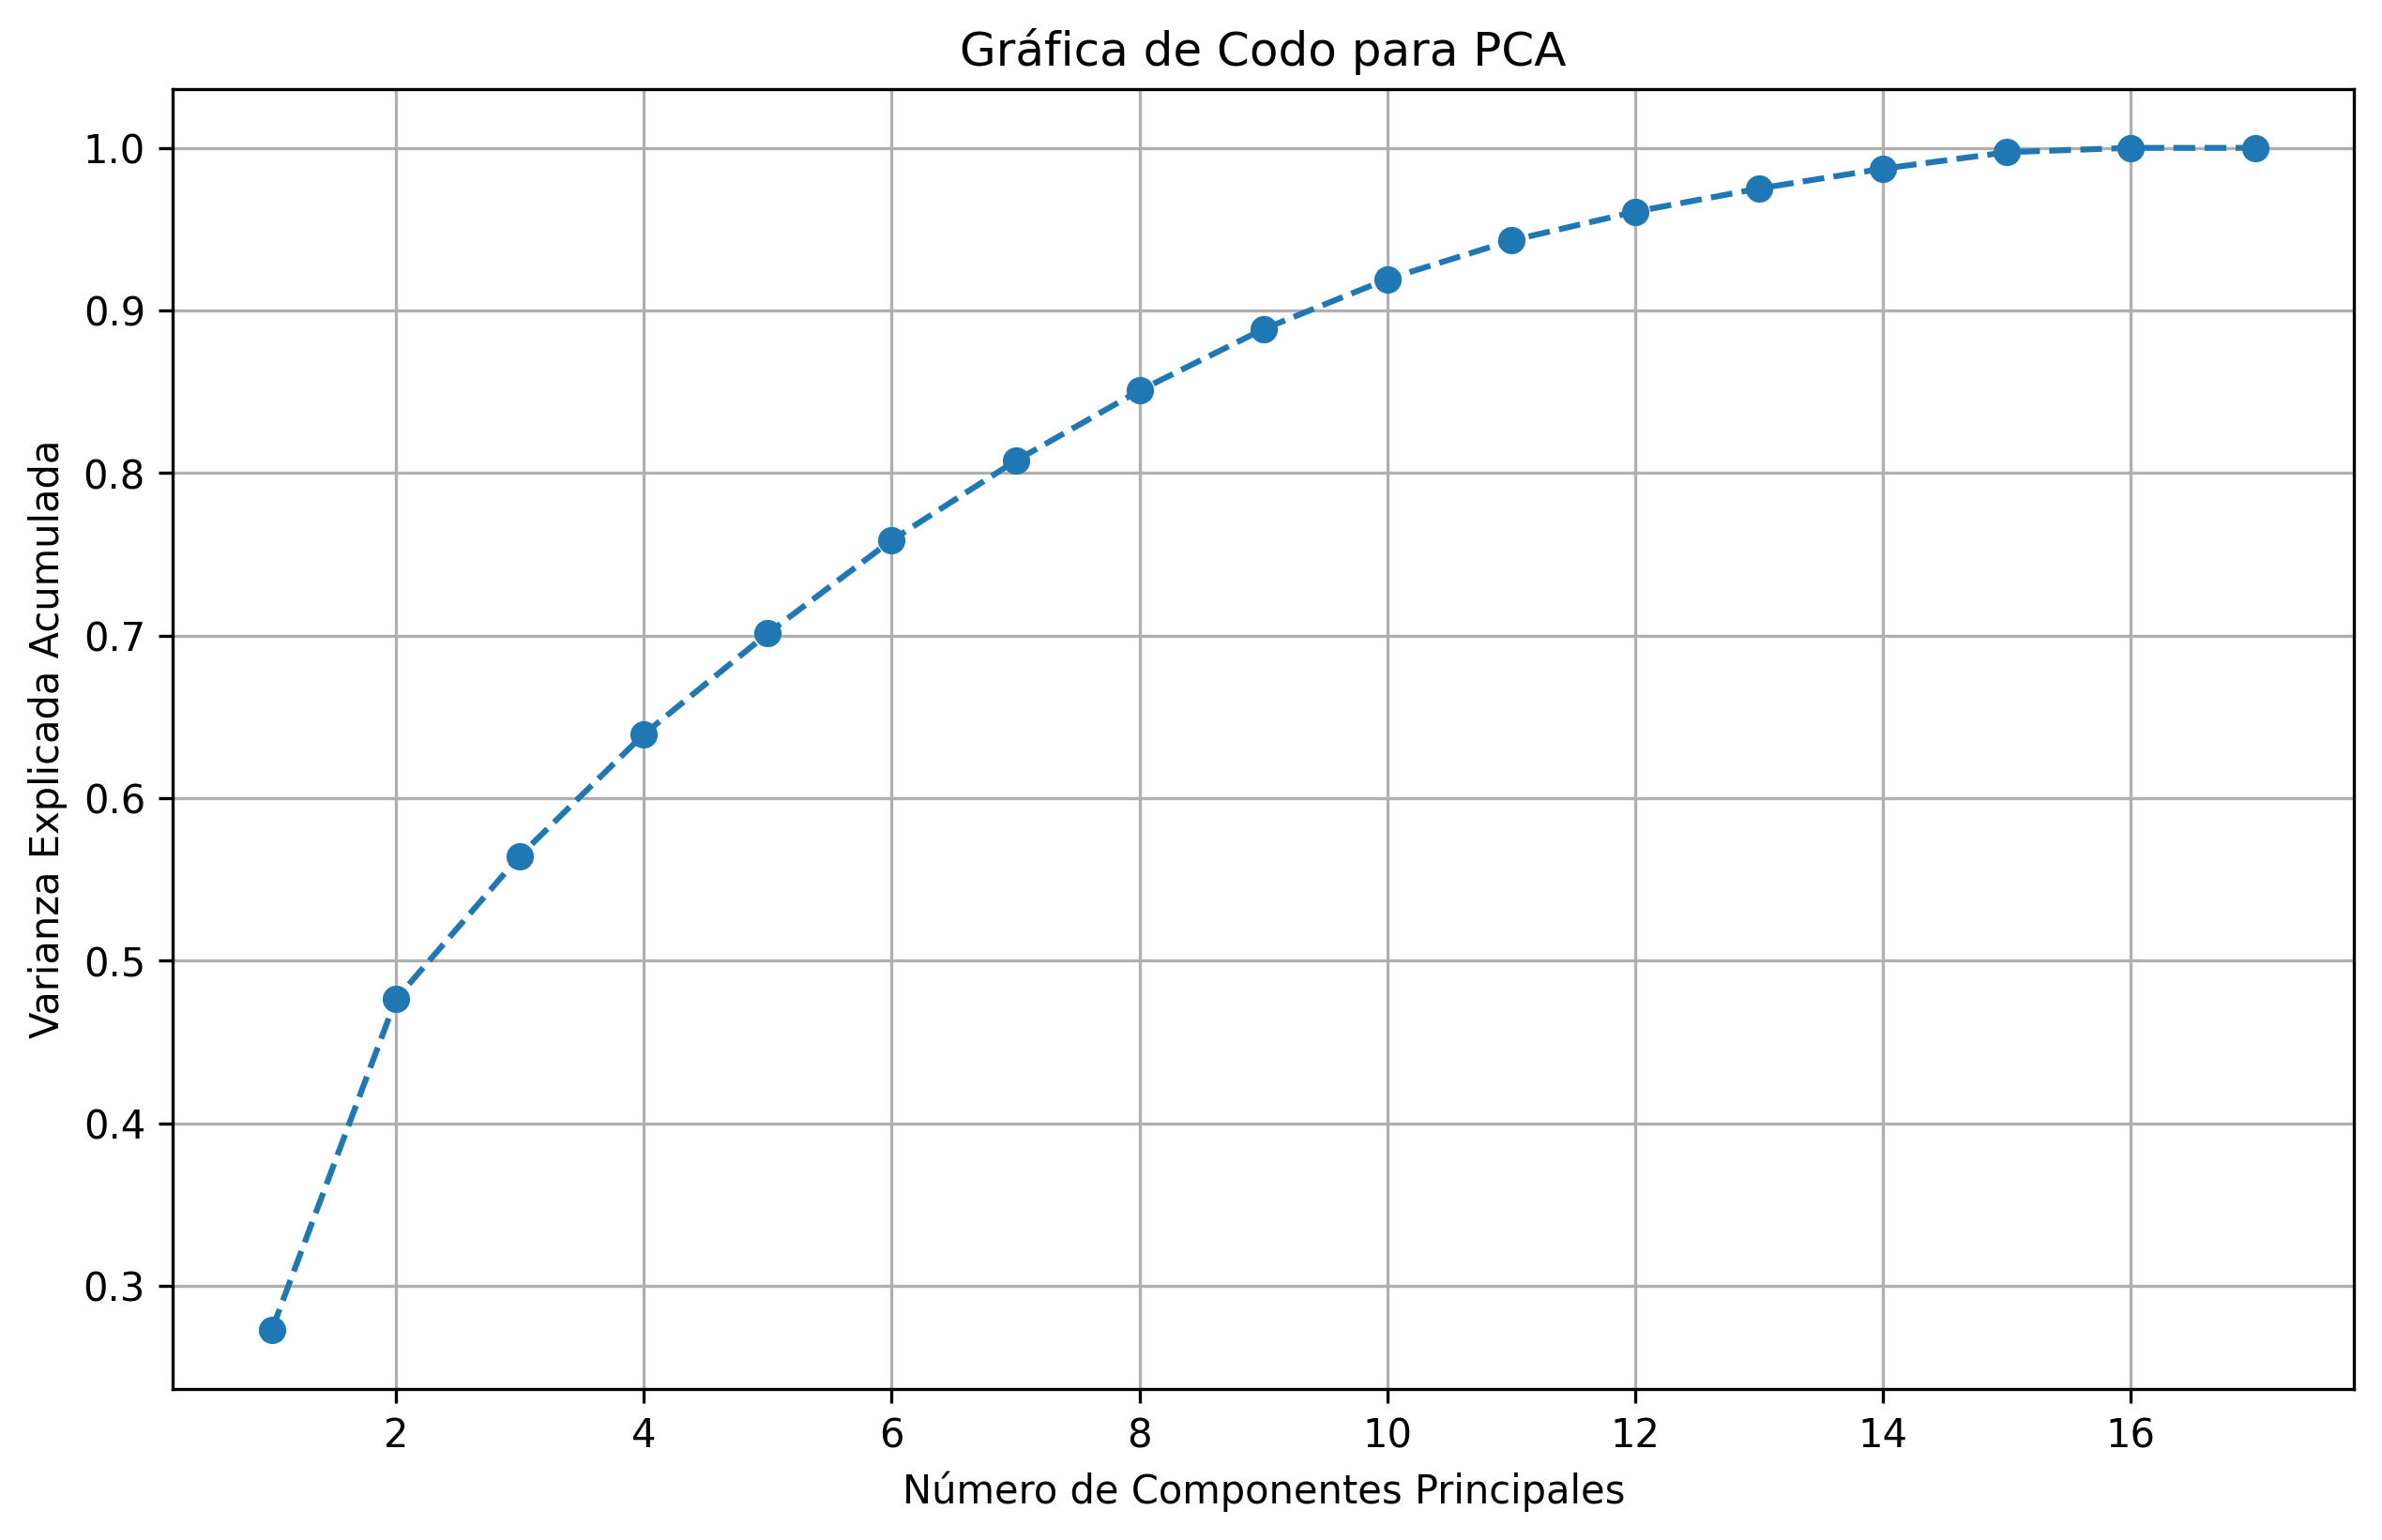

In [44]:
# Grafico del metodo de codo
# Graficar la gráfica de codo
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfica de Codo para PCA')
plt.grid(True)
plt.show()

Con base en el gráfico de codo, seleccionamos el número de componentes que expliquen suficiente varianza, por ejemplo, 95%:

Observacion:
Con base en el gráfico de codo, seleccionamos el número de componentes que explica suficiente la varianza: 80%

Componentes Clave: Las primeras componentes principales que  capturar la mayor parte de la varianza es CPA=8, que explica el 80%



## Crear y ajustar el objeto PCA a los datos

In [45]:
pca6=PCA(n_components=6)
pca6.fit(datos)

PCA(n_components=6)

## Crear la matriz de correlación variables originales y los componentes

In [46]:
# Crear un data frame llamado df_pca8_componentes que contiene la carga de los ocho primeros componentes que explica el 80%
df_pca6_componentes=pd.DataFrame(pca6.components_,
                                 columns=datos.columns,
                                 index=["CP1","CP2","CP3","CP4","CP5","CP6"])
df_pca6_componentes.T
df_trans=df_pca6_componentes.T
df_trans

,CP1,CP2,CP3,CP4,CP5,CP6
balance,0.291744,-0.300770,0.275369,0.054855,0.719933,-0.476541
frecuencia.balance,0.000008,-0.000005,0.000012,0.000010,0.000043,-0.000014
compras,0.292490,0.501524,-0.096010,0.294864,0.288772,0.269159
deunavez.maxima,0.210648,0.380909,-0.077512,0.186013,0.279678,0.302693
importe.plazos,0.081837,0.120654,-0.018525,0.108868,0.009019,-0.033619
adelanto.efectivo,0.216248,-0.204715,0.396795,-0.565114,0.139372,0.632894
frecuencia.compra,0.000013,0.000037,-0.000030,0.000045,-0.000005,0.000015
deunavez.frecuentes,0.000023,0.000028,-0.000028,0.000025,0.000021,0.000032
plazos.frecuentes,0.000008,0.000030,-0.000017,0.000038,-0.000011,-0.000007
efectivo.frecuentes,0.000010,-0.000019,0.000029,-0.000032,0.000034,0.000021


In [47]:
df_pca6_componentes

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
CP1,0.291744,0.000008,0.292490,0.210648,0.081837,0.216248,0.000013,0.000023,0.000008,0.000010,0.000405,0.002341,0.689597,0.487224,0.136254,0.000002,0.000039
CP2,-0.300770,-0.000005,0.501524,0.380909,0.120654,-0.204715,0.000037,0.000028,0.000030,-0.000019,-0.000505,0.003520,-0.447094,0.470304,-0.188047,0.000026,0.000003
CP3,0.275369,0.000012,-0.096010,-0.077512,-0.018525,0.396795,-0.000030,-0.000028,-0.000017,0.000029,0.000991,-0.000956,-0.507108,0.292246,0.639209,-0.000027,-0.000026
CP4,0.054855,0.000010,0.294864,0.186013,0.108868,-0.565114,0.000045,0.000025,0.000038,-0.000032,-0.001164,0.003093,0.090638,-0.363734,0.635382,0.000001,0.000053
CP5,0.719933,0.000043,0.288772,0.279678,0.009019,0.139372,-0.000005,0.000021,-0.000011,0.000034,0.000710,0.002234,-0.230880,-0.368635,-0.333735,-0.000057,-0.000067
CP6,-0.476541,-0.000014,0.269159,0.302693,-0.033619,0.632894,0.000015,0.000032,-0.000007,0.000021,0.001098,0.000970,0.073590,-0.426177,0.141806,0.000027,-0.000176


In [48]:
ruta="C:\\Usuarios\\alber\\OneDrive\\Documentos\\Analisis de datos\\mi_resultado.xlsx"
df_trans.to_excel(ruta, index=True)


In [49]:
from google.colab import files

df_trans.to_excel('/content/mi_resultado1.xlsx',index=True)
files.download('/content/mi_resultado1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualizacion de los componentes con el mapa de calor

<Axes: >

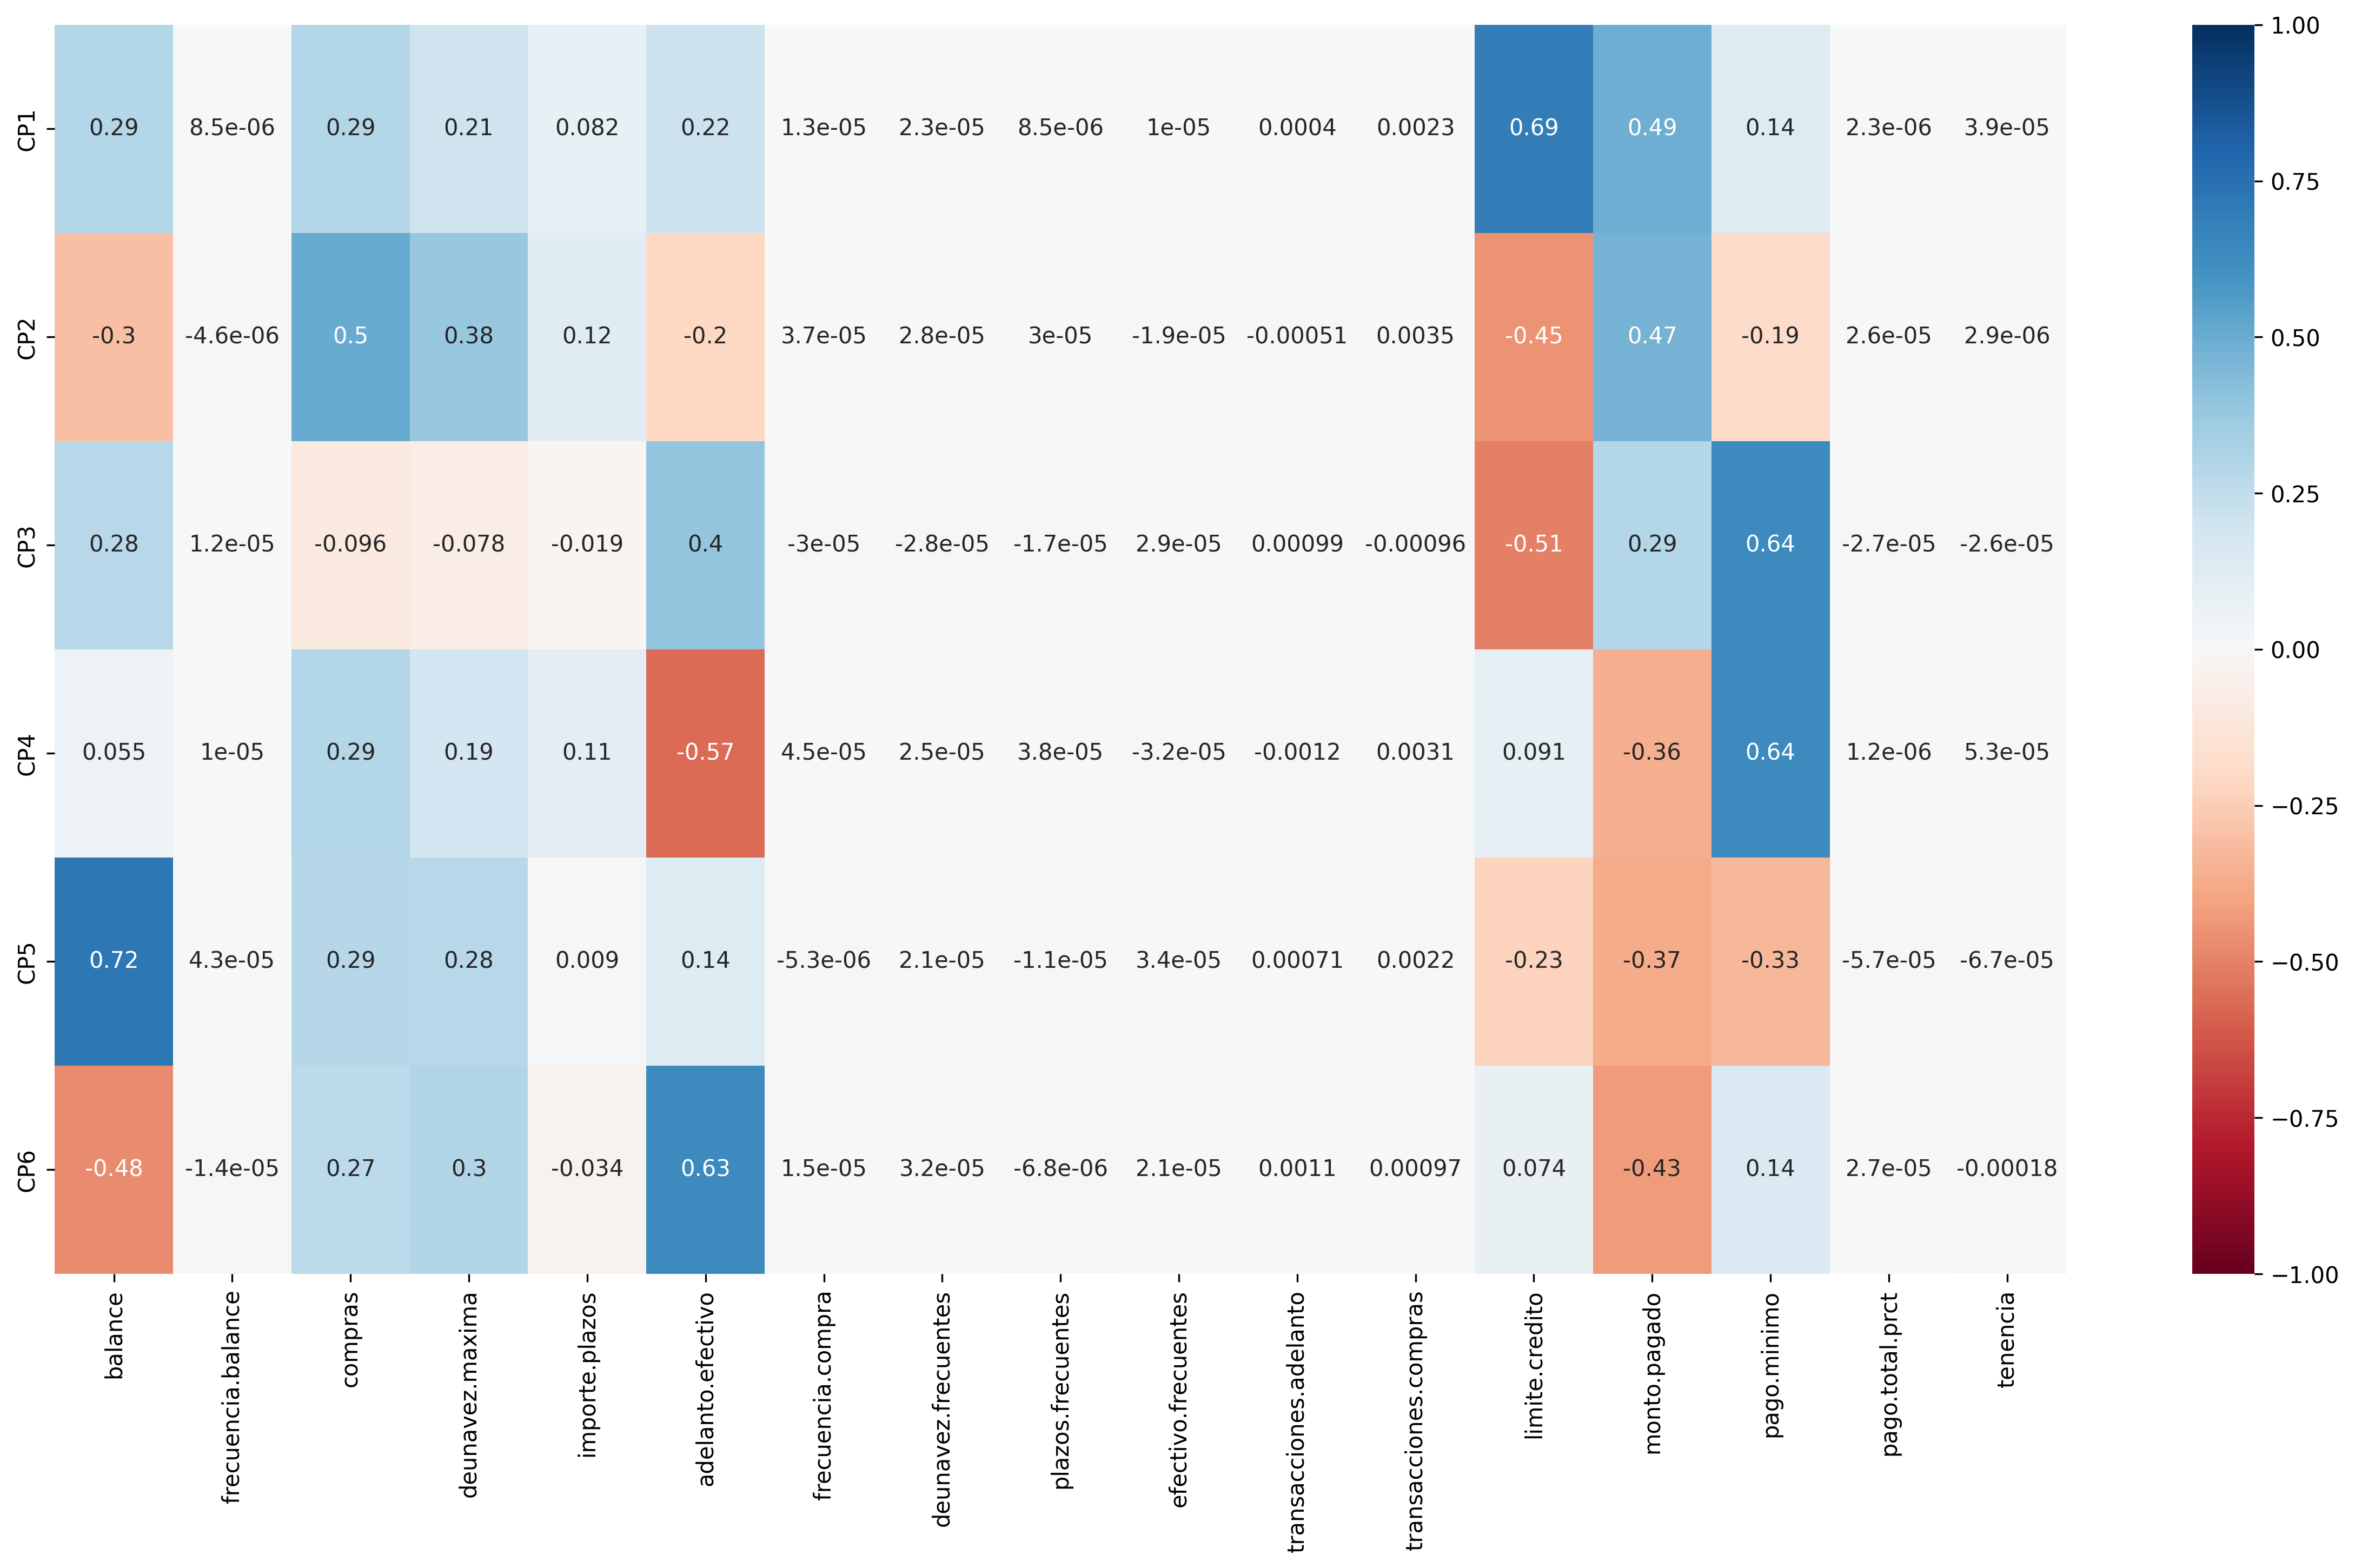

In [50]:
# Crear el Mapa de Calor
plt.figure(figsize=(20,10),dpi=300)
sns.heatmap(df_pca6_componentes,annot=True,
            cmap="RdBu",
            vmin=-1,
            vmax= 1)

## Resumen de Comportamiento:


Observacion de los resultados

Observación:
Clasificación por Componentes Principales:

*CP1 - Actividad general de la tarjeta de crédito:

Fuertemente correlacionado con: Límite de crédito (0.689597), monto pagado (0.487224).

Descripción: Este componente captura la actividad general relacionada con el uso de la tarjeta de crédito, incluyendo el límite disponible y los pagos realizados.

CP2 - Uso para compras a plazos y máximo de compras de una vez:

Fuertemente correlacionado con: Compras de una vez máxima (0.501524), compras de una vez frecuencia (0.380909).

Descripción: Este componente representa el uso de la tarjeta para realizar compras grandes de una vez y compras a plazos.

CP3 - Compras frecuentes y pago total:

Fuertemente correlacionado con: Frecuencia de compra de una vez (0.396795), frecuencia de pago total (0.639209).

Descripción: Este componente captura las compras frecuentes realizadas y los pagos totales efectuados.

CP4 - Adelantos en efectivo y frecuencia de adelantos:

Fuertemente correlacionado con: Adelanto en efectivo (-0.565114), frecuencia de adelantos (0.635382).

Descripción: Este componente se centra en la utilización de la tarjeta para adelantos en efectivo y la frecuencia de tales transacciones.

CP5 - Saldo y frecuencia de saldo:

Fuertemente correlacionado con: Saldo de la cuenta de la tarjeta (0.719933).

Descripción: Este componente refleja la cantidad de saldo mantenida en la tarjeta y la frecuencia con la que se mantiene el saldo.

CP6 - Adelantos en efectivo y frecuencia de compras frecuentes:

Fuertemente correlacionado con: Adelanto en efectivo (0.632894), frecuencia de compras a plazos (-0.426177).

Descripción: Este componente combina la frecuencia de adelantos en efectivo con la frecuencia de compras a plazos.

## Utilizar kmeans con PCA

Tranformar la base de datos de 17 variables originales a 6 variables latentes

In [51]:
# crear array que viene siendo las variables latentes
score_pca6=pca6.transform(datos)
score_pca6

array([[-4.32250297e+03,  9.12075900e+02,  2.11345568e+02,
        -1.43620714e+02, -6.10556423e+01, -9.52898755e+00],
       [ 4.12288176e+03, -2.44037939e+03,  2.34315136e+03,
        -3.93220261e+03, -5.01156080e+01,  1.45029925e+03],
       [ 1.50043702e+03, -2.00332309e+03, -2.09766609e+03,
         1.07052502e+03,  2.98524756e+02, -3.91001623e+02],
       ...,
       [-4.37576493e+03,  9.01886777e+02,  1.29192870e+02,
        -1.17222345e+02,  4.42837428e+00,  5.36286620e+01],
       [-4.78724798e+03,  1.02258485e+03,  3.85624860e+02,
        -2.48557539e+02,  9.42818975e+01,  1.91533657e+01],
       [-3.62043944e+03,  1.54671969e+03, -3.49301757e-01,
         3.26062749e+02,  8.10650840e+02,  5.82022826e+02]])

In [52]:
#estandarizar score_pca6 para esto:
#Crear el objeto con standarscaler
standarizar=StandardScaler()

In [54]:
# ajustar el standarizar a mi datos score_pca6, donde voy ajustar

pca6_std=standarizar.fit_transform(score_pca6)
pca6_std

array([[-9.45689228e-01,  3.26484012e-01,  8.51306525e-02,
        -6.43155735e-02, -4.20152673e-02, -8.72165078e-03],
       [ 9.02015544e-01, -8.73551046e-01,  9.43828660e-01,
        -1.76090105e+00, -3.44869136e-02,  1.32742367e+00],
       [ 3.28269788e-01, -7.17103652e-01, -8.44946432e-01,
         4.79397636e-01,  2.05428965e-01, -3.57874285e-01],
       ...,
       [-9.57342029e-01,  3.22836744e-01,  5.20392903e-02,
        -5.24939765e-02,  3.04737321e-03,  4.90850113e-02],
       [-1.04736743e+00,  3.66041473e-01,  1.55330894e-01,
        -1.11307904e-01,  6.48798206e-02,  1.75306103e-02],
       [-7.92089817e-01,  5.53659240e-01, -1.40699835e-04,
         1.46015934e-01,  5.57847079e-01,  5.32711351e-01]])

In [55]:
# Determinar el numero optimo de cluster Método de Codo
# Crear WCSS

wcss=[] # Crear la lista
for i in range(1,12):
  kmediaspca6=KMeans(n_clusters=i,
                init="k-means++",
                random_state=99)
  kmediaspca6.fit(pca6_std)
  wcss.append(kmediaspca6.inertia_)


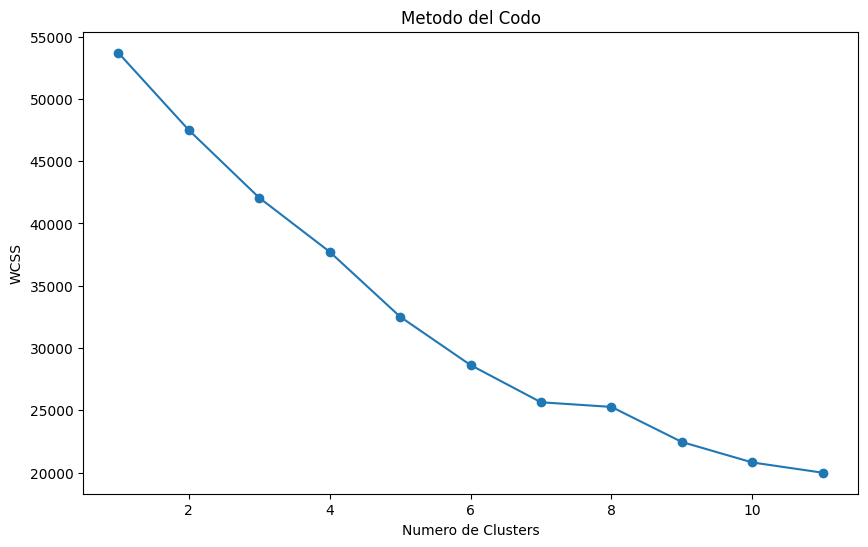

In [56]:
# Visualizamos el grafico de codo o WCSS
plt.figure(figsize=(10,6))
plt.plot(range(1,12),wcss,marker="o")
plt.title("Metodo del Codo")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS")# suma de las distancias al cuadrado dentro de los clusters
plt.show()

Observacion:
"Método del Codo" se utiliza para determinar el número óptimo de clusters en un conjunto de datos para el algoritmo k-means. El eje x está etiquetado como "Número de Clusters" y varía de 1 a 10, mientras que el eje y está etiquetado como "WCSS" (Suma de Cuadrados Dentro del Cluster)
en el gráfico el numero optimo es 7

## Implementamos los kmeans

In [63]:
# Creamos la instancia de los n_cluster=6
cluster_k6_pca6=KMeans(n_clusters=6,
                init="k-means++",
                random_state=99)

In [65]:
# Construimos el modelo con los score_pca6 estandarizado
cluster_k6_pca6.fit(pca6_std)

KMeans(n_clusters=6, random_state=99)

In [66]:
# unimos un df con las variables originales y las variables latentes
df_cluster_k6_pca6=pd.concat([datos.reset_index(drop=True),pd.DataFrame(score_pca6)],axis=1)
df_cluster_k6_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,0,1,2,3,4,5
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,-61.055642,-9.528988
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,-50.115608,1450.299249
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,298.524756,-391.001623
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,581.994140,725.259494
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,221.902588,-566.473886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,325.594462,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,-27.084979,-23.120095
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,275.861322,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,3.505129,-2.329043
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,81.270775,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,4.428374,53.628662
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,52.549959,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,94.281898,19.153366


In [67]:
# agregamos las variables latentes
df_cluster_k6_pca6.columns.values[-6:]=["Actividad general de la tarjeta de crédito"," Uso para compras a plazos y máximo de compras de una vez","Compras frecuentes y pago total"," Adelantos en efectivo y frecuencia de adelantos","Saldo y frecuencia de saldo","Adelantos en efectivo y frecuencia de compras frecuentes"]
df_cluster_k6_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,Actividad general de la tarjeta de crédito,Uso para compras a plazos y máximo de compras de una vez,Compras frecuentes y pago total,Adelantos en efectivo y frecuencia de adelantos,Saldo y frecuencia de saldo,Adelantos en efectivo y frecuencia de compras frecuentes
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,-61.055642,-9.528988
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,-50.115608,1450.299249
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,298.524756,-391.001623
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,581.994140,725.259494
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,221.902588,-566.473886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,325.594462,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,-27.084979,-23.120095
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,275.861322,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,3.505129,-2.329043
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,81.270775,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,4.428374,53.628662
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,52.549959,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,94.281898,19.153366


In [72]:
#Agregamos la columna de los cluster cluster_k6_pca6
df_cluster_k6_pca6["cluster6"]=cluster_k6_pca6.labels_
df_cluster_k6_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,pago.total.prct,tenencia,Actividad general de la tarjeta de crédito,Uso para compras a plazos y máximo de compras de una vez,Compras frecuentes y pago total,Adelantos en efectivo y frecuencia de adelantos,Saldo y frecuencia de saldo,Adelantos en efectivo y frecuencia de compras frecuentes,cluster7,cluster6
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,-61.055642,-9.528988,5,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,-50.115608,1450.299249,3,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,298.524756,-391.001623,4,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,581.994140,725.259494,4,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,221.902588,-566.473886,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,-27.084979,-23.120095,5,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,3.505129,-2.329043,5,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,4.428374,53.628662,5,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,94.281898,19.153366,5,5


In [73]:
# Estimar el promedio del variable por  clusters
# Agrupamos
medias_agrupadas=df_cluster_k6_pca6.groupby("cluster6").mean()
medias_agrupadas

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,pago.minimo,pago.total.prct,tenencia,Actividad general de la tarjeta de crédito,Uso para compras a plazos y máximo de compras de una vez,Compras frecuentes y pago total,Adelantos en efectivo y frecuencia de adelantos,Saldo y frecuencia de saldo,Adelantos en efectivo y frecuencia de compras frecuentes,cluster7
cluster6,,,,,,,,,,,,,,,,,,,,,
0,3454.900773,0.977922,15195.287143,11665.765385,3529.521758,600.232877,0.913736,0.813487,0.688445,0.047619,...,1857.814962,0.446875,11.956044,17871.285589,14036.561140,-858.073413,3586.757234,2097.224137,1215.606035,0.0
1,6089.633953,0.997623,1307.993793,739.168822,568.903828,1893.459667,0.457011,0.243984,0.338783,0.274142,...,2180.342941,0.003946,11.851590,5289.700307,-3135.301524,446.577754,806.145062,1732.218993,-1309.474190,1.0
2,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,...,27995.061876,0.000000,11.916667,4199.302785,-6252.934362,18035.424170,17472.549398,-7134.769495,2559.431408,2.0
3,3767.716361,0.913880,691.004456,432.135323,258.869133,7222.670120,0.293500,0.142737,0.199519,0.462737,...,1374.854675,0.063683,11.070565,5528.360326,-2007.668520,2983.489878,-4146.455260,253.687887,1651.030975,3.0
4,720.052291,0.844145,1359.678936,796.371442,564.188047,307.288894,0.615852,0.332988,0.427533,0.052479,...,309.795945,0.293182,11.827251,2465.486825,-839.326663,-2765.134398,419.985775,-1342.071387,234.996769,4.0
5,910.523793,0.863745,664.092801,357.274479,307.019222,510.101504,0.469913,0.156151,0.358715,0.112037,...,556.209275,0.140238,11.410010,-2239.243146,683.117276,362.655960,-46.904122,115.853025,-50.781992,5.0


In [74]:
# quiero las ultimas columnas utilizando iloc()
medias_agrupadas.iloc[:,-6:]

,Uso para compras a plazos y máximo de compras de una vez,Compras frecuentes y pago total,Adelantos en efectivo y frecuencia de adelantos,Saldo y frecuencia de saldo,Adelantos en efectivo y frecuencia de compras frecuentes,cluster7
cluster6,,,,,,
0,14036.561140,-858.073413,3586.757234,2097.224137,1215.606035,0.0
1,-3135.301524,446.577754,806.145062,1732.218993,-1309.474190,1.0
2,-6252.934362,18035.424170,17472.549398,-7134.769495,2559.431408,2.0
3,-2007.668520,2983.489878,-4146.455260,253.687887,1651.030975,3.0
4,-839.326663,-2765.134398,419.985775,-1342.071387,234.996769,4.0
5,683.117276,362.655960,-46.904122,115.853025,-50.781992,5.0


Observación:
Vamos a clasificar los siete clusters basándonos en las medias agrupadas de las variables latentes obtenidas del análisis de componentes principales:

Cluster 1: Clientes Muy Activos con Frecuentes Compras y Adelantos en Efectivo

Actividad general de la tarjeta de crédito: Muy alta

Uso para compras a plazos y máximo de compras de una vez: Alto

Compras frecuentes y pago total: Moderado

Adelantos en efectivo y frecuencia de adelantos: Negativos

Saldo y frecuencia de saldo: Negativos

Adelantos en efectivo y frecuencia de compras frecuentes: Negativos

Cluster 2: Clientes Moderadamente Activos con Variado Comportamiento de Compras y Adelantos

Actividad general de la tarjeta de crédito: Moderada

Uso para compras a plazos y máximo de compras de una vez: Negativo

Compras frecuentes y pago total: Bajo

Adelantos en efectivo y frecuencia de adelantos: Moderado

Saldo y frecuencia de saldo: Moderado

Adelantos en efectivo y frecuencia de compras frecuentes: Negativo

Cluster 3: Clientes Frecuentes con Altos Adelantos en Efectivo y Compras

Actividad general de la tarjeta de crédito: Moderada

Uso para compras a plazos y máximo de compras de una vez: Negativo

Compras frecuentes y pago total: Muy alto

Adelantos en efectivo y frecuencia de adelantos: Muy alto

Saldo y frecuencia de saldo: Negativo

Adelantos en efectivo y frecuencia de compras frecuentes: Moderado

Cluster 4: Clientes Activos con Adelantos Negativos y Saldos Moderados

Actividad general de la tarjeta de crédito: Moderada

Uso para compras a plazos y máximo de compras de una vez: Negativo

Compras frecuentes y pago total: Moderado

Adelantos en efectivo y frecuencia de adelantos: Negativos

Saldo y frecuencia de saldo: Moderado

Adelantos en efectivo y frecuencia de compras frecuentes: Moderado

Cluster 5: Clientes con Baja Actividad y Adelantos Moderados

Actividad general de la tarjeta de crédito: Baja

Uso para compras a plazos y máximo de compras de una vez: Negativo

Compras frecuentes y pago total: Negativo

Adelantos en efectivo y frecuencia de adelantos: Moderado

Saldo y frecuencia de saldo: Negativo

Adelantos en efectivo y frecuencia de compras frecuentes: Bajo

Cluster 6: Clientes Inactivos con Comportamiento de Adelantos Bajo

Actividad general de la tarjeta de crédito: Negativa

Uso para compras a plazos y máximo de compras de una vez: Bajo

Compras frecuentes y pago total: Bajo

Adelantos en efectivo y frecuencia de adelantos: Negativo

Saldo y frecuencia de saldo: Bajo

Adelantos en efectivo y frecuencia de compras frecuentes: Negativo

Cluster 7: Clientes Muy Activos con Altos Saldos y Adelantos

Actividad general de la tarjeta de crédito: Muy alta

Uso para compras a plazos y máximo de compras de una vez: Muy alto

Compras frecuentes y pago total: Negativo

Adelantos en efectivo y frecuencia de adelantos: Moderado

Saldo y frecuencia de saldo: Muy alto

Adelantos en efectivo y frecuencia de compras frecuentes: Moderado